In [1]:
from zero import ZeroClient
import client_data
import client_ml
import client_plot
from prefect import task, Flow, Parameter
from prefect.tasks.prefect import create_flow_run, wait_for_flow_run

In [2]:
client1 = ZeroClient("localhost", 5559)
client2 = ZeroClient("localhost", 5558)
client3 = ZeroClient("localhost", 5557)
clients = [client1, client2, client3]

In [3]:
dfs = []
for i in range(len(clients)):
    data_id =  "covid_" + str(i) + ".csv"
    df = client_data.client_csv_to_df(clients[i], data_id)
    dfs.append(df)

In [4]:
dfs

[{'id': '17b643b3388c472ca2f1e80cdf486fe4',
  'type': "<class 'pandas.core.frame.DataFrame'>",
  '_SecretClientObject': True},
 {'id': 'ed0496c439634c35973f64b60917c476',
  'type': "<class 'pandas.core.frame.DataFrame'>",
  '_SecretClientObject': True},
 {'id': 'b7132462b3f74074b8af886becb120c1',
  'type': "<class 'pandas.core.frame.DataFrame'>",
  '_SecretClientObject': True}]

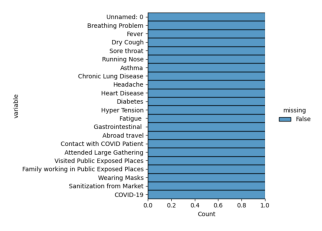

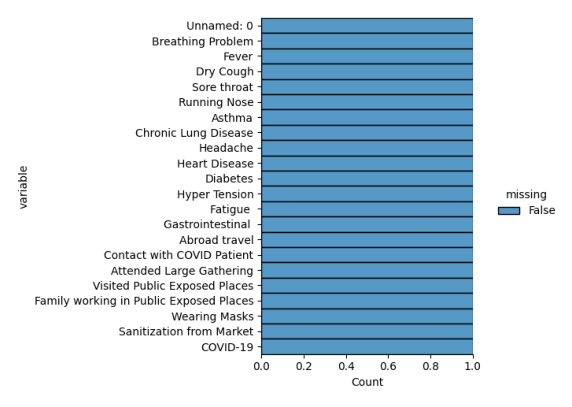

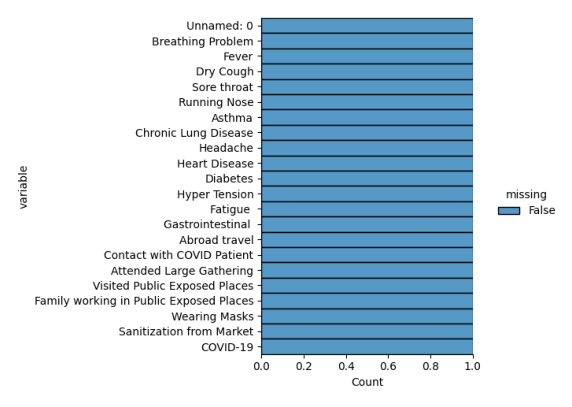

In [5]:
for i in range(len(clients)):
    client_plot.client_plot_miss(clients[i], dfs[i])

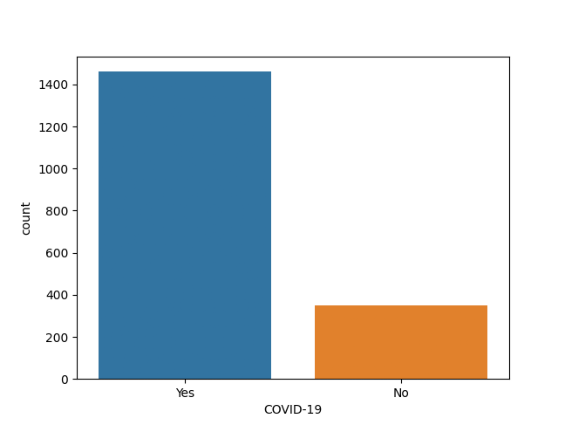

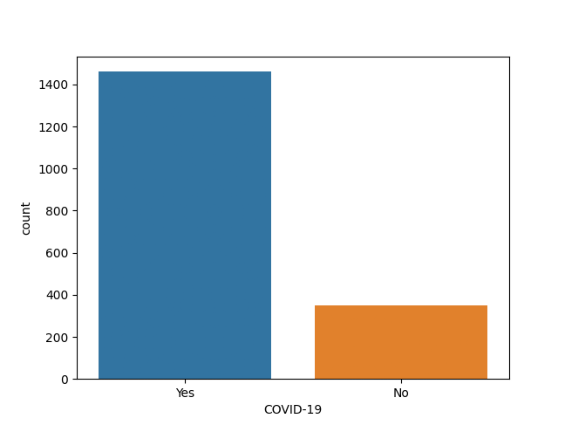

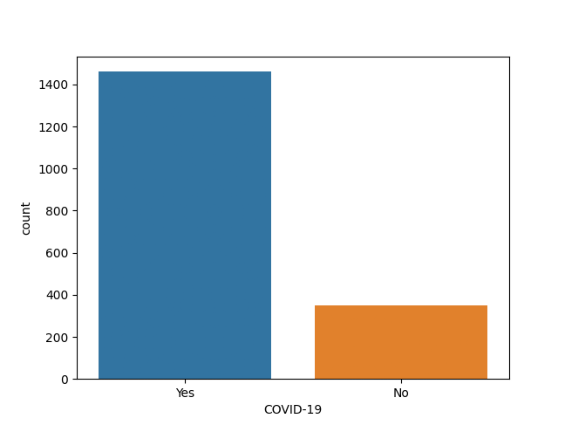

In [6]:
for i in range(len(clients)):
    client_plot.client_plot_countplot(clients[i], "COVID-19", dfs[i])

In [7]:
col_labels = []
for i in range(len(clients)):
    col_label = client_data.client_df_get_col_names(clients[i], dfs[i])
    col_types = client_data.client_df_get_unique(clients[i], dfs[i])
    print(col_types)
    col_labels.append(list(col_label))

{'Breathing Problem': ['Yes', 'No'], 'Fever': ['Yes', 'No'], 'Dry Cough': ['Yes', 'No'], 'Sore throat': ['Yes', 'No'], 'Running Nose': ['Yes', 'No'], 'Asthma': ['No', 'Yes'], 'Chronic Lung Disease': ['No', 'Yes'], 'Headache': ['No', 'Yes'], 'Heart Disease': ['No', 'Yes'], 'Diabetes': ['Yes', 'No'], 'Hyper Tension': ['Yes', 'No'], 'Fatigue ': ['Yes', 'No'], 'Gastrointestinal ': ['Yes', 'No'], 'Abroad travel': ['No', 'Yes'], 'Contact with COVID Patient': ['Yes', 'No'], 'Attended Large Gathering': ['No', 'Yes'], 'Visited Public Exposed Places': ['Yes', 'No'], 'Family working in Public Exposed Places': ['Yes', 'No'], 'Wearing Masks': ['No'], 'Sanitization from Market': ['No'], 'COVID-19': ['Yes', 'No']}
{'Breathing Problem': ['Yes', 'No'], 'Fever': ['Yes', 'No'], 'Dry Cough': ['Yes', 'No'], 'Sore throat': ['Yes', 'No'], 'Running Nose': ['No', 'Yes'], 'Asthma': ['No', 'Yes'], 'Chronic Lung Disease': ['No', 'Yes'], 'Headache': ['No', 'Yes'], 'Heart Disease': ['No', 'Yes'], 'Diabetes': ['Yes'

In [8]:
for i in range(len(clients)):
    dfs[i] = client_data.client_fit_transform(clients[i], dfs[i], col_labels[0])

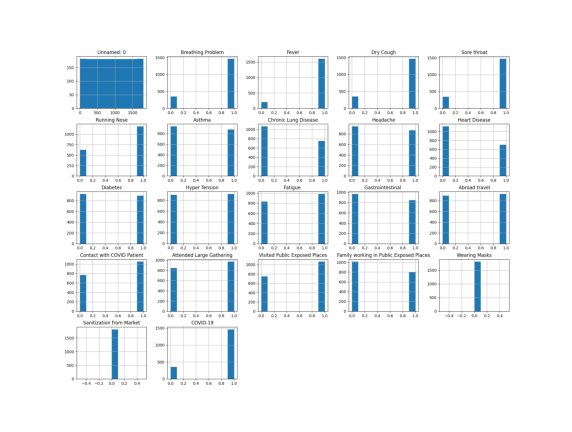

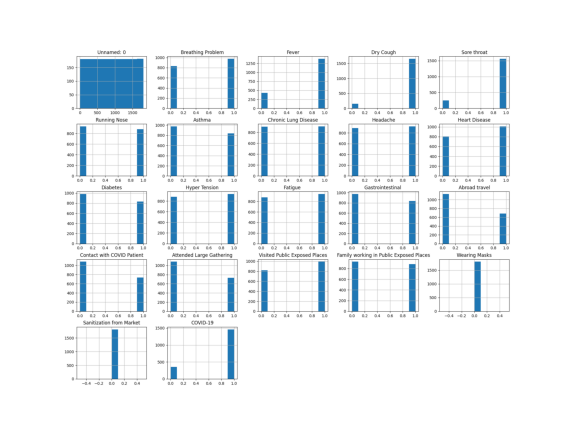

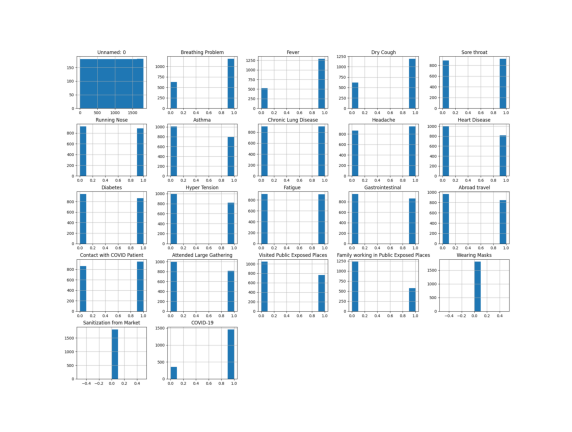

In [9]:
for i in range(len(clients)):
    client_plot.client_plot_hist(clients[i], dfs[i])

In [10]:
for i in range(len(clients)):
    print(client_plot.client_plot_corr(clients[i], dfs[i]))

,Unnamed: 0,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Unnamed: 0,1.000000,-0.684512,-0.450525,-0.684512,-0.428419,0.130605,-0.134542,0.038541,0.045615,-0.075748,-0.065193,-0.092722,0.026917,-0.042957,-0.257849,-0.187797,-0.165800,0.004404,-0.089114,nan,nan,-0.684512
Breathing Problem,-0.684512,1.000000,0.730689,1.000000,0.798498,-0.021325,0.144439,-0.080858,-0.068950,-0.002271,0.031846,0.061584,-0.095206,0.020332,0.498333,0.483576,0.334560,0.090496,0.073559,nan,nan,1.000000
Fever,-0.450525,0.730689,1.000000,0.730689,0.742517,-0.037175,0.109901,0.008394,-0.098160,-0.127351,0.042362,0.037935,-0.148195,-0.075239,0.364126,0.306803,0.146553,0.027711,0.031727,nan,nan,0.730689
Dry Cough,-0.684512,1.000000,0.730689,1.000000,0.798498,-0.021325,0.144439,-0.080858,-0.068950,-0.002271,0.031846,0.061584,-0.095206,0.020332,0.498333,0.483576,0.334560,0.090496,0.073559,nan,nan,1.000000
Sore throat,-0.428419,0.798498,0.742517,0.798498,1.000000,0.008446,0.125133,-0.035085,-0.098761,-0.052915,0.033798,0.046572,-0.087303,0.025588,0.419867,0.413553,0.270582,0.084868,0.102752,nan,nan,0.798498
Running Nose,0.130605,-0.021325,-0.037175,-0.021325,0.008446,1.000000,-0.082130,-0.013072,0.151505,-0.104596,0.077706,-0.181604,-0.051449,-0.018695,0.158282,0.047139,0.089386,0.132545,-0.124497,nan,nan,-0.021325
Asthma,-0.134542,0.144439,0.109901,0.144439,0.125133,-0.082130,1.000000,-0.139138,0.147859,0.089766,-0.066857,-0.054928,-0.084793,0.376342,0.123149,0.016439,-0.068572,0.033862,-0.265151,nan,nan,0.144439
Chronic Lung Disease,0.038541,-0.080858,0.008394,-0.080858,-0.035085,-0.013072,-0.139138,1.000000,-0.081097,-0.104265,0.130266,0.121407,-0.026045,-0.218815,-0.169670,-0.084739,-0.031882,-0.196943,0.137641,nan,nan,-0.080858
Headache,0.045615,-0.068950,-0.098160,-0.068950,-0.098761,0.151505,0.147859,-0.081097,1.000000,0.070943,-0.017295,-0.329950,0.014480,0.164527,0.031612,-0.099771,-0.361488,0.105896,-0.060377,nan,nan,-0.068950
Heart Disease,-0.075748,-0.002271,-0.127351,-0.002271,-0.052915,-0.104596,0.089766,-0.104265,0.070943,1.000000,-0.058609,0.158587,0.013904,0.137143,-0.092501,0.009875,-0.122498,0.137075,0.055824,nan,nan,-0.002271


None


,Unnamed: 0,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Unnamed: 0,1.000000,-0.338106,-0.576622,-0.409630,-0.543977,-0.092057,-0.067201,0.084739,0.020211,0.075941,-0.053932,-0.110301,-0.056455,-0.041141,-0.169825,-0.313958,-0.267810,0.050234,-0.081870,nan,nan,-0.683914
Breathing Problem,-0.338106,1.000000,-0.084778,-0.031297,0.252832,-0.017107,0.015367,-0.060587,-0.069472,-0.135541,0.118152,0.035009,0.051039,-0.151417,-0.041341,0.132060,0.129023,0.030981,-0.010802,nan,nan,0.223378
Fever,-0.576622,-0.084778,1.000000,0.021692,0.391162,0.153252,0.049653,-0.095547,-0.004646,0.008461,0.064138,0.109712,-0.010281,0.009347,0.126346,0.187347,0.122223,-0.005351,-0.054078,nan,nan,0.410866
Dry Cough,-0.409630,-0.031297,0.021692,1.000000,0.259395,0.010700,-0.043029,-0.038514,0.036750,-0.039956,0.006250,0.047686,-0.056268,0.119476,0.145507,0.144595,0.159706,-0.065771,0.161674,nan,nan,0.363106
Sore throat,-0.543977,0.252832,0.391162,0.259395,1.000000,0.103588,0.040275,-0.142965,0.038871,-0.057081,0.037636,0.090900,0.068389,0.031524,0.311404,0.329620,0.328487,-0.087463,0.018876,nan,nan,0.817635
Running Nose,-0.092057,-0.017107,0.153252,0.010700,0.103588,1.000000,0.001657,0.080182,0.077299,-0.006084,0.021418,0.087554,0.031421,-0.016004,0.005686,-0.065940,0.031917,-0.008876,-0.018963,nan,nan,0.066814
Asthma,-0.067201,0.015367,0.049653,-0.043029,0.040275,0.001657,1.000000,0.062785,-0.034701,0.034928,-0.066829,0.062436,0.046415,0.024953,0.016759,-0.025531,-0.067585,-0.033411,-0.086638,nan,nan,0.013355
Chronic Lung Disease,0.084739,-0.060587,-0.095547,-0.038514,-0.142965,0.080182,0.062785,1.000000,-0.014958,-0.028665,-0.005867,-0.035980,-0.041535,-0.052396,-0.078481,-0.072037,-0.039423,-0.015238,-0.061243,nan,nan,-0.116117
Headache,0.020211,-0.069472,-0.004646,0.036750,0.038871,0.077299,-0.034701,-0.014958,1.000000,-0.042551,0.029675,-0.136922,0.074005,0.036147,0.078974,-0.045612,-0.055719,-0.008835,0.026390,nan,nan,0.058730
Heart Disease,0.075941,-0.135541,0.008461,-0.039956,-0.057081,-0.006084,0.034928,-0.028665,-0.042551,1.000000,-0.042369,0.070837,-0.029032,-0.074569,-0.033335,-0.020012,-0.000369,0.120292,0.000080,nan,nan,-0.033776


None


,Unnamed: 0,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Unnamed: 0,1.000000,-0.196641,-0.423744,0.071532,-0.121247,0.123096,-0.085697,-0.029405,-0.060375,-0.076237,-0.044545,0.011916,0.051128,-0.013756,-0.392597,0.220935,0.119804,-0.025320,-0.373460,nan,nan,-0.398028
Breathing Problem,-0.196641,1.000000,-0.184459,-0.215161,0.113071,0.098833,0.074197,-0.110976,-0.037061,0.020902,-0.003137,0.048962,0.011911,-0.084529,-0.096000,0.009393,0.109453,0.062528,0.023477,nan,nan,0.254541
Fever,-0.423744,-0.184459,1.000000,-0.181666,0.023791,0.028454,0.061068,0.053992,-0.005678,0.034799,0.038809,0.068748,-0.067588,0.024501,-0.050972,0.023610,-0.067800,-0.067143,0.027726,nan,nan,0.059021
Dry Cough,0.071532,-0.215161,-0.181666,1.000000,-0.336024,-0.075270,0.115337,-0.018221,-0.046909,0.096735,-0.037693,0.096767,-0.001992,-0.058731,0.391764,-0.095834,-0.050695,0.113637,0.174450,nan,nan,0.141986
Sore throat,-0.121247,0.113071,0.023791,-0.336024,1.000000,-0.025590,0.067168,0.019319,0.029589,0.050094,-0.040682,-0.035423,-0.065670,0.037877,0.046008,0.007476,0.140111,0.085007,0.053868,nan,nan,0.154381
Running Nose,0.123096,0.098833,0.028454,-0.075270,-0.025590,1.000000,-0.005154,-0.072340,-0.000744,-0.012575,0.022901,0.015239,0.023692,-0.009231,-0.092643,-0.020646,0.017334,-0.062996,-0.064206,nan,nan,-0.063153
Asthma,-0.085697,0.074197,0.061068,0.115337,0.067168,-0.005154,1.000000,-0.019392,0.001306,0.114152,0.096877,0.041903,0.054713,-0.096037,0.060997,0.019113,-0.005784,0.049961,-0.001545,nan,nan,0.112075
Chronic Lung Disease,-0.029405,-0.110976,0.053992,-0.018221,0.019319,-0.072340,-0.019392,1.000000,-0.064695,-0.018257,0.022683,-0.110336,-0.067917,0.116658,-0.001624,-0.007210,0.033917,-0.049652,0.051742,nan,nan,0.025442
Headache,-0.060375,-0.037061,-0.005678,-0.046909,0.029589,-0.000744,0.001306,-0.064695,1.000000,0.110539,0.086550,-0.152846,0.071427,0.092245,0.027824,-0.095510,-0.063746,-0.100986,0.004918,nan,nan,-0.073275
Heart Disease,-0.076237,0.020902,0.034799,0.096735,0.050094,-0.012575,0.114152,-0.018257,0.110539,1.000000,0.011880,-0.084787,-0.155091,-0.045107,0.107562,-0.004996,0.028289,0.013155,0.027533,nan,nan,0.117211


None


In [11]:
cleaned_dfs = []
dropped_labels = ['Running Nose', 
                  'Chronic Lung Disease', 
                  'Headache', 
                  'Heart Disease', 
                  'Diabetes', 
                  'Gastrointestinal ', 
                  'Wearing Masks', 
                  'Sanitization from Market', 
                  'Asthma', 
                  'Fatigue ']
for i in range(len(clients)):
    cleaned_df = client_data.client_df_drop(clients[i], dfs[i], dropped_labels)
    cleaned_dfs.append(cleaned_df)

In [12]:
X = []
y = []
for i in range(len(clients)):
    X.append(client_data.client_df_drop(clients[i], cleaned_dfs[i], 'COVID-19'))
    y.append(client_data.client_df_get_col(clients[i], cleaned_dfs[i], 'COVID-19'))

In [13]:
m = client_ml.FederatedLogisticRegression(clients)

In [10]:
m.data_setup(X, y, 0.2)
m.model_setup(lr=0.5)

/home/saildeveloper/ScratchPad/JingweiZhang/prefect_related/client_ml.py:136: RuntimeWarning: invalid value encountered in divide
  tprs.append(float(true_positive) / (true_positive + false_negative))


[0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.19834710743801653, 0.1983471074

/home/saildeveloper/ScratchPad/JingweiZhang/prefect_related/client_ml.py:137: RuntimeWarning: invalid value encountered in divide
  fprs.append(float(false_positive) / (false_positive + true_negative))


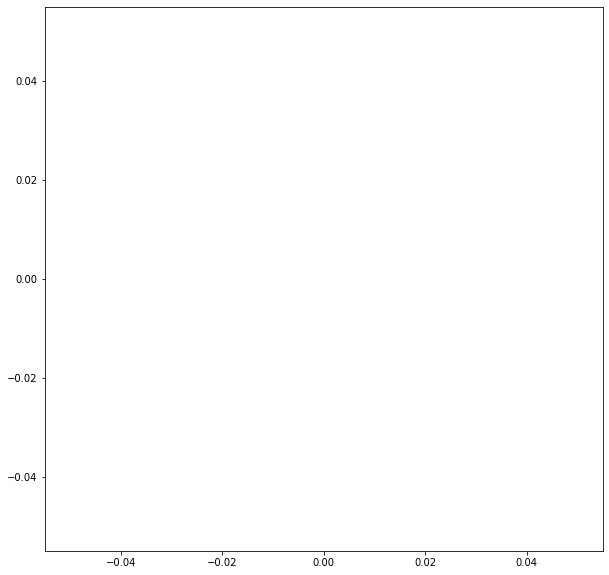

In [15]:
m.fit(100)
m.report()

In [14]:
task_csv_to_df = task(client_data.client_csv_to_df)
task_fit_transform = task(client_data.client_fit_transform)
task_df_drop = task(client_data.client_df_drop)
task_df_get_col = task(client_data.client_df_get_col)
task_df_get_col_names = task(client_data.client_df_get_col_names)

@task
def get_result(x):
    return x

dropped_labels = ['Running Nose',
                  'Chronic Lung Disease', 
                  'Headache', 
                  'Heart Disease', 
                  'Diabetes', 
                  'Gastrointestinal ', 
                  'Wearing Masks', 
                  'Sanitization from Market', 
                  'Asthma', 
                  'Fatigue ']

In [15]:
with Flow("preprocess") as f_preprocess:
    parameter_dropped_labels = Parameter("X", default = dropped_labels)
    parameter_y_label = Parameter("y_label", default = 'COVID-19')
    
    X = []
    y = []
    for i in range(len(clients)):
        data_id =  "covid_" + str(i) + ".csv"
        df = task_csv_to_df(clients[i], data_id)
        col_label = task_df_get_col_names(clients[i], df)
        df = task_fit_transform(clients[i], df, col_label)
        cleaned_df = task_df_drop(clients[i], df, parameter_dropped_labels)
        X.append(task_df_drop(clients[i], cleaned_df, parameter_y_label))
        y.append(task_df_get_col(clients[i], cleaned_df, parameter_y_label))
    resX = get_result(X)
    resy = get_result(y)

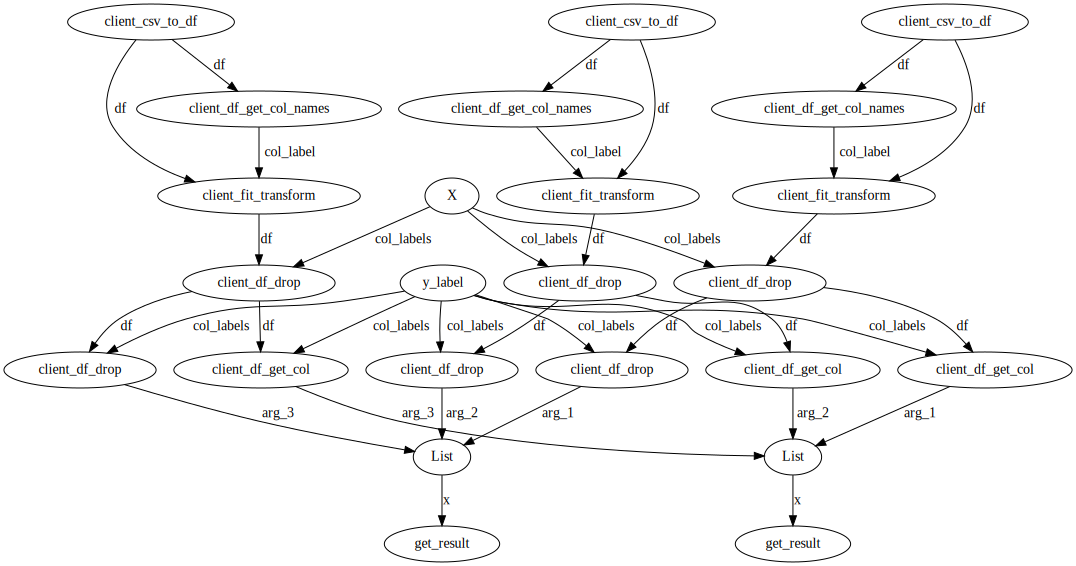

In [16]:
f_preprocess.visualize()

In [17]:
state = f_preprocess.run()

[2022-07-01 21:51:10+0000] INFO - prefect.FlowRunner | Beginning Flow run for 'preprocess'


01-Jul-22 21:51:10  INFO  45514  flow_runner > Beginning Flow run for 'preprocess'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'y_label': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'y_label': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'y_label': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'y_label': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_csv_to_df': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_csv_to_df': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_csv_to_df': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_csv_to_df': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col_names': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col_names': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col_names': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col_names': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_csv_to_df': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_csv_to_df': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_csv_to_df': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_csv_to_df': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_csv_to_df': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_csv_to_df': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_csv_to_df': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_csv_to_df': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'X': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'X': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'X': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'X': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_fit_transform': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_fit_transform': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_fit_transform': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_fit_transform': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col_names': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col_names': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col_names': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col_names': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col_names': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col_names': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col_names': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col_names': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_fit_transform': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_fit_transform': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_fit_transform': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_fit_transform': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_fit_transform': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_fit_transform': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_fit_transform': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_fit_transform': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_drop': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_drop': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'client_df_get_col': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'client_df_get_col': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'get_result': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'get_result': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'get_result': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'get_result': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'get_result': Starting task run...


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'get_result': Starting task run...


[2022-07-01 21:51:10+0000] INFO - prefect.TaskRunner | Task 'get_result': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:10  INFO  45514  task_runner > Task 'get_result': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:10+0000] INFO - prefect.FlowRunner | Flow run SUCCESS: all reference tasks succeeded


01-Jul-22 21:51:10  INFO  45514  flow_runner > Flow run SUCCESS: all reference tasks succeeded


In [18]:
print(state.result[resX].result)
print(state.result[resy].result)

[{'id': 'cacbc0e5e42e41e788ac79ebfeddfb10', 'type': "<class 'pandas.core.frame.DataFrame'>", '_SecretClientObject': True}, {'id': '6ab66d82dba44e78922ab422e65c3c19', 'type': "<class 'pandas.core.frame.DataFrame'>", '_SecretClientObject': True}, {'id': '9a0a2f16dad94129be27e9199081beb7', 'type': "<class 'pandas.core.frame.DataFrame'>", '_SecretClientObject': True}]
[{'id': 'ea7424d5458841f88176d9063befc335', 'type': "<class 'pandas.core.series.Series'>", '_SecretClientObject': True}, {'id': 'dd4a997594e748e6b36b553f5fd2f6c5', 'type': "<class 'pandas.core.series.Series'>", '_SecretClientObject': True}, {'id': 'bed5c7cfa2c648698f700b9aa00e5bde', 'type': "<class 'pandas.core.series.Series'>", '_SecretClientObject': True}]


In [ ]:
train_state = m.run_graph(state.result[resX].result, state.result[resy].result)

[2022-07-01 21:51:12+0000] INFO - prefect.FlowRunner | Beginning Flow run for 'fed_logistic_regression'


01-Jul-22 21:51:12  INFO  45514  flow_runner > Beginning Flow run for 'fed_logistic_regression'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X[2]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X[2]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X[2]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X[2]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'loss_fn': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'loss_fn': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'loss_fn': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'loss_fn': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X[0]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X[0]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X[1]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X[1]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'X[1]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'X[1]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'opt': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'opt': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'opt': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'opt': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_set_loss_fn': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_set_loss_fn': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_set_loss_fn': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_set_loss_fn': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'train_test_ratio': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'train_test_ratio': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'train_test_ratio': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'train_test_ratio': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y[2]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y[2]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y[2]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y[2]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'lr': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'lr': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'lr': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'lr': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y[1]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y[1]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y[1]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y[1]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y[0]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y[0]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'y[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'y[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_set_loss_fn': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_set_loss_fn': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_set_loss_fn': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_set_loss_fn': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[2]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[2]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[2]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[2]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_set_loss_fn': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_set_loss_fn': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_set_loss_fn': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_set_loss_fn': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[3]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[3]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[3]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[3]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[1]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[1]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[1]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[1]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[2]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[2]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[2]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[2]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[1]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[1]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[1]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[1]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[1]': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[1]': Starting task run...


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[1]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_train_test_split[1]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:12+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:12  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[0]': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[0]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[3]': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[3]': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[3]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[3]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[2]': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[2]': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[2]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[2]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[3]': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[3]': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_train_test_split[3]': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_train_test_split[3]': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_get_shape': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_get_shape': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_get_shape': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_get_shape': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_to_torch_tensor': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_get_shape': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_get_shape': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_get_shape': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_get_shape': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_get_shape': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_get_shape': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_df_get_shape': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_df_get_shape': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'create_model': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'create_model': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'create_model': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'create_model': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_ml_model': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_ml_model': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_ml_model': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_ml_model': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_ml_model': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_ml_model': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_ml_model': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_ml_model': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_opt_method': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_opt_method': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_opt_method': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_opt_method': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_opt_method': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_opt_method': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_opt_method': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_opt_method': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_ml_model': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_ml_model': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_ml_model': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_ml_model': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_opt_method': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_opt_method': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'client_set_opt_method': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'client_set_opt_method': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'train': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'train': Starting task run...


training
[2022-07-01 21:51:13+0000] ERROR - prefect.TaskRunner | Task 'train': Exception encountered during task execution!
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/prefect/engine/task_runner.py", line 880, in get_task_run_state
    value = prefect.utilities.executors.run_task_with_timeout(
  File "/usr/local/lib/python3.8/dist-packages/prefect/utilities/executors.py", line 468, in run_task_with_timeout
    return task.run(*args, **kwargs)  # type: ignore
  File "/home/saildeveloper/ScratchPad/JingweiZhang/prefect_related/client_ml.py", line 182, in train
    models[i] = res[0]
KeyError: 0


01-Jul-22 21:51:13  ERROR  45514  task_runner > Task 'train': Exception encountered during task execution!
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/prefect/engine/task_runner.py", line 880, in get_task_run_state
    value = prefect.utilities.executors.run_task_with_timeout(
  File "/usr/local/lib/python3.8/dist-packages/prefect/utilities/executors.py", line 468, in run_task_with_timeout
    return task.run(*args, **kwargs)  # type: ignore
  File "/home/saildeveloper/ScratchPad/JingweiZhang/prefect_related/client_ml.py", line 182, in train
    models[i] = res[0]
KeyError: 0


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'train': Finished task run for task with final state: 'Failed'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'train': Finished task run for task with final state: 'Failed'


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'test': Starting task run...


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'test': Starting task run...


[2022-07-01 21:51:13+0000] INFO - prefect.TaskRunner | Task 'test': Finished task run for task with final state: 'TriggerFailed'


01-Jul-22 21:51:13  INFO  45514  task_runner > Task 'test': Finished task run for task with final state: 'TriggerFailed'


[2022-07-01 21:51:13+0000] INFO - prefect.FlowRunner | Flow run FAILED: some reference tasks failed.


01-Jul-22 21:51:13  INFO  45514  flow_runner > Flow run FAILED: some reference tasks failed.
